In [1]:
import pandas as pd
import os


filename_ytrain = "../Data/Y_train_CVw08PX.csv"
filename_Xtrain = "../Data/X_train_update.csv"
filename_Xtest = "../Data/X_test_update.csv"


#print(filename_ytrain)
y_train = pd.read_csv("../Data/Y_train_CVw08PX.csv", index_col=0)
print("Y_train shape : ", y_train.shape)
X_train = pd.read_csv(filename_Xtrain, index_col=0)
print("X_train shape : ", X_train.shape)
X_test = pd.read_csv(filename_Xtest, index_col=0)
print("X_test shape : ", X_test.shape)


Y_train shape :  (84916, 1)
X_train shape :  (84916, 4)
X_test shape :  (13812, 4)


In [2]:
display(X_train.head())
X_train.isna().sum()
X_train.info()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: count, dtype: int64

Nb de code category =  27


/tmp/ipykernel_1642/3698979668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_count.index, y=y_train_count.values, order=y_train_count.index, palette='viridis')


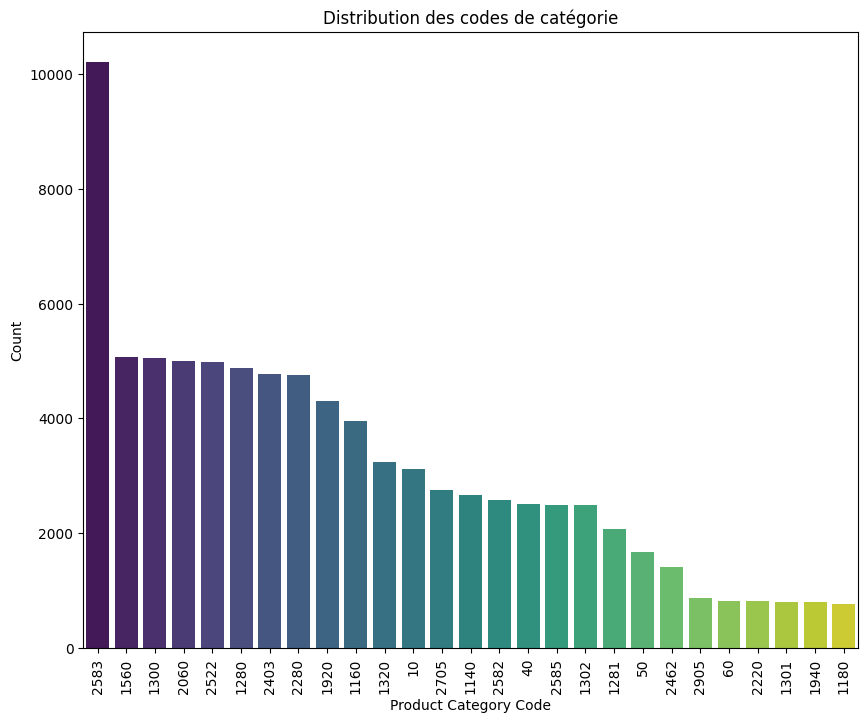

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_count = y_train['prdtypecode'].value_counts().sort_values(ascending=False)
display(y_train_count)
print("Nb de code category = ", y_train_count.shape[0])
#print(tmp.index)
#print(tmp.values)
#plt.bar(height=tmp, x=tmp.index, width=0.8)
#plt.show()
plt.figure(figsize=(10,8))
sns.barplot(x=y_train_count.index, y=y_train_count.values, order=y_train_count.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Product Category Code")
plt.ylabel("Count")
plt.title("Distribution des codes de catégorie")
plt.show()

prdtypecode
2583    12.022469
1560     5.974139
1300     5.941165
2060     5.879928
2522     5.875218
1280     5.735079
2403     5.622026
2280     5.605540
1920     5.067361
1160     4.655189
1320     3.816713
10       3.669509
2705     3.251448
1140     3.145461
2582     3.048895
40       2.953507
2585     2.939375
1302     2.933487
1281     2.437703
50       1.979603
2462     1.673418
2905     1.026897
60       0.979792
2220     0.970371
1301     0.950351
1940     0.945640
1180     0.899713
Name: proportion, dtype: float64

Nb de code category =  27


/tmp/ipykernel_1642/2592058101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_count_p.index, y=y_train_count_p.values, order=y_train_count_p.index, palette='viridis')


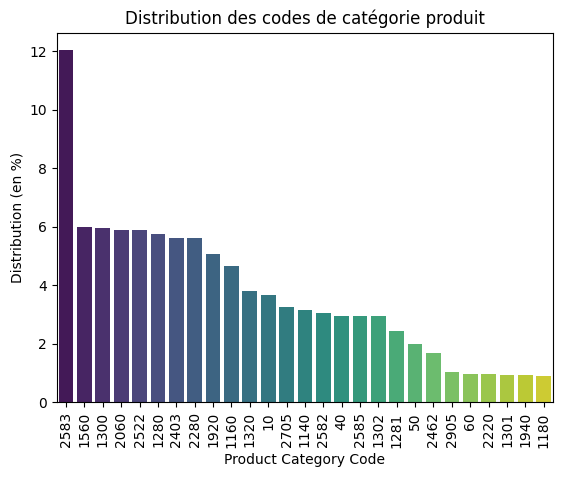

In [10]:
y_train_count_p = y_train['prdtypecode'].value_counts(normalize=True).sort_values(ascending=False)
y_train_count_p = y_train_count_p*100
display(y_train_count_p)
print("Nb de code category = ", y_train_count_p.shape[0])
sns.barplot(x=y_train_count_p.index, y=y_train_count_p.values, order=y_train_count_p.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Product Category Code")
plt.ylabel("Distribution (en %)")
plt.title("Distribution des codes de catégorie produit")
plt.show()

In [8]:
filtre = y_train.loc[y_train['prdtypecode'] == 1180]
product_1180 = X_train.iloc[filtre.index,:]
#filtre
product_1180.head(20)

,designation,description,productid,imageid
22,Le Seigneur Des Anneaux Figurine En Plomb À Pe...,NaN,1893048509,1110089245
41,Présentoir À Biscuits Et Chocolats,NaN,1548294503,1092313319
106,Comtes Vampires Lahmiane À Pied Et Montée Lahm...,NaN,4187799604,1312712907
154,Mournblade - Ecran Et Cartes Des Jeunes Royaumes,NaN,4180534759,1309774406
524,Warhammer 40000 ( 40k ) - Exo Armure Xv88 Broa...,Ce kit contient 91 composants en plastique ain...,255257554,968831698
666,Greyhawk Ad&d The Adventure Begins,NaN,3404365132,1211830337
721,Rage Across The Amazon,NaN,18063547,345655117
747,Masque Halloween Masques Led Glow Light Up Mas...,Masque Halloween LED Masques Glow Masque Effra...,4151009771,1301850198
764,Vert Intérieur P010 Gamme Air - Pot De 17ml - ...,NaN,273333595,975261028
999,Red Steel - Savage Baronies,<br />Daring swashbucklers.<br />Stout mercena...,76198034,846816060


,count,nb_isna,ratio_isna,ratio_var
prdtypecode,,,,
2583,10209,903,8.845137,12.022469
1560,5073,177,3.489060,5.974139
1300,5045,1173,23.250743,5.941165
2060,4993,286,5.728019,5.879928
2522,4989,1189,23.832431,5.875218
1280,4870,1068,21.930185,5.735079
2403,4774,4648,97.360704,5.622026
2280,4760,4440,93.277311,5.605540
1920,4303,207,4.810597,5.067361


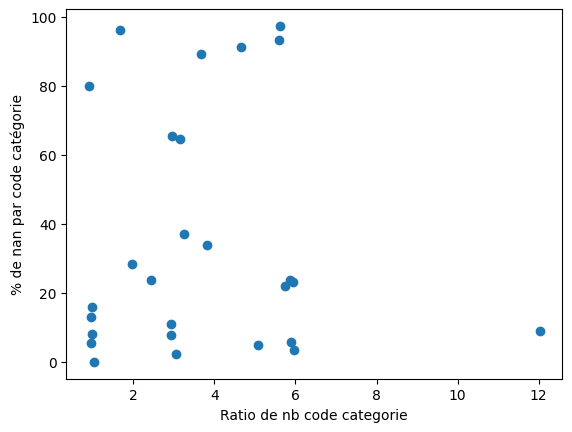

In [11]:

#index_xt = X_train.index
#index_yt = y_train.index
#diff = index_xt - index_yt

#df = pd.concat([X_train, y_train], axis=1)
#df.head()

xtrain_isna = X_train.isna()
df = pd.concat([xtrain_isna, y_train], axis=1)
tmp = df.groupby('prdtypecode')['description'].agg('sum')
tmp
#sns.barplot(x=tmp.index, y=tmp.values, order=tmp.index, palette='viridis')
#plt.xticks(rotation=90)
#plt.xlabel("Product Category Code")
#plt.ylabel("Distribution (en %)")
#plt.title("Distribution des codes de catégorie produit")

eval_isna = pd.DataFrame(data=y_train_count, index=y_train_count.index)
eval_isna['nb_isna'] = eval_isna.apply(lambda x: tmp[x.index])
eval_isna['ratio_isna'] = eval_isna['nb_isna'] / eval_isna['count'] * 100.
eval_isna['ratio_var'] = eval_isna['count'] / X_train.shape[0] * 100.
display(eval_isna.head(27))

plt.scatter(x=eval_isna['ratio_var'], y=eval_isna['ratio_isna'])
plt.xlabel('Ratio de nb code categorie')
plt.ylabel('% de nan par code catégorie')
plt.show()



3804725264
1263597046
500
500
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


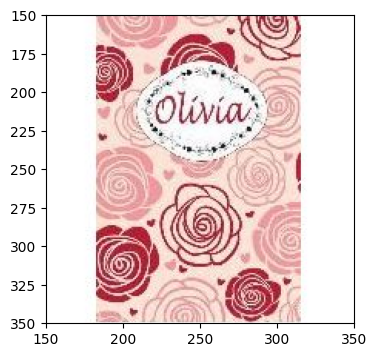

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def get_image(product_id, image_id, type):
    """ 
    Fonction Pour récupérer le tableau correspondant à l'image product_id et image_id
    - product_id : type int 
    - image_id : type int
    - type = 'train' ou 'test'
    """
    filename = 'image' + '_' + str(image_id) + '_' + 'product' + '_' + str(product_id)+'.jpg'
    ### pathname dépend de l'arborescence locale où sont stockées les images (hors repo Github)
    if (type!='train') and (type!='test'):
        return []
    pathname = "../../Images/image_" + type + "/"
    img = mpimg.imread(pathname+filename)
    return img

def get_test1_get_image():
    product_id = X_train.iloc[0,:]['productid']
    image_id = X_train.iloc[0, :]['imageid']
    print(product_id)
    print(image_id)
    img = get_image(product_id, image_id, 'train')
    #print(img.shape[0])
    #print(img.shape[1])
    print(img)
#    print(np.min(img[:,0,:]))
    plt.figure(figsize=(4, 4))
    #plt.axis('off')
    plt.imshow(img, origin='upper', aspect='equal')
    plt.xlim([150, 350])
    plt.ylim([350, 150])
    plt.show()
#    display(X_train.head())



get_test1_get_image()

In [55]:
def get_size_image(product_id, image_id, type):
    """
    return the size (x,y) of the image referred by product_id & image_id 
    input type must be 'train' or 'test'
    """
    img = get_image(product_id, image_id, type)
    if len(img) == 0:
        return [0,0]
    return [img.shape[0], img.shape[1]]

def get_test1_get_image_size():
    product_id = X_train.iloc[0,:]['productid']
    image_id = X_train.iloc[0, :]['imageid']
    x, y = get_size_image(product_id, image_id, 'train')
    print(x, y)

get_test1_get_image_size()

500 500


In [63]:
tmp = X_train
tmp['img_shape'] = tmp.apply(lambda x: get_size_image(x['productid'], x['imageid'], 'train'), axis=1)
#tmp['img_shape'] = get_size_image(tmp['productid'], tmp['imageid'], 'train')
tmp.head()
tmp.to_csv('../Data/X_train_img_shape.csv')


In [66]:
tmp['img_shape'].isna().sum()
tmp['img_shape'].value_counts()
#Toutes les images associée à X_train sont de taille (500, 500)


img_shape
[500, 500]    84916
Name: count, dtype: int64

In [68]:
tmp_test = X_test
tmp_test['img_shape'] = tmp_test.apply(lambda x: get_size_image(x['productid'], x['imageid'], 'test'), axis=1)
#tmp['img_shape'] = get_size_image(tmp['productid'], tmp['imageid'], 'train')
display(tmp_test.head())
tmp_test.to_csv('../Data/X_test_img_shape.csv')

,designation,description,productid,imageid,img_shape
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171,"[500, 500]"
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667,"[500, 500]"
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357,"[500, 500]"
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052,"[500, 500]"
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690,"[500, 500]"


In [69]:
tmp_test['img_shape'].isna().sum()
tmp_test['img_shape'].value_counts()
#Toutes les images associée à X_train sont de taille (500, 500)

img_shape
[500, 500]    13812
Name: count, dtype: int64

In [70]:
import os

def get_size_image(product_id, image_id, type):
    """
    Function to get size of image associated to product_id & image_id
    input type must be 'train' or 'test'. Else value 0 is returned
    """
    filename = 'image' + '_' + str(image_id) + '_' + 'product' + '_' + str(product_id)+'.jpg'
    ### pathname dépend de l'arborescence locale où sont stockées les images (hors repo Github)
    if (type!='train') and (type!='test'):
        return 0
    pathname = "../../Images/image_" + type + "/"
    size = os.stat(pathname+filename).st_size
    return size

def test1_get_size_image():
    product_id = X_train.iloc[0,:]['productid']
    image_id = X_train.iloc[0, :]['imageid']
    size = get_size_image(product_id, image_id, 'train')
    print(size)

test1_get_size_image()


14010


In [75]:

tmp_test['img_size'] = tmp_test.apply(lambda x: get_size_image(x['productid'], x['imageid'], 'test'), axis=1)
tmp_test.head()
tmp_test.to_csv('../Data/X_test_img_inf.csv')

In [ ]:
tmp_train = tmp
tmp_train['img_size'] = tmp_train.apply(lambda x: get_size_image(x['productid'], x['imageid'], 'train'), axis=1)
tmp_train.head()
tmp_train.to_csv('../Data/X_train_img_inf.csv')

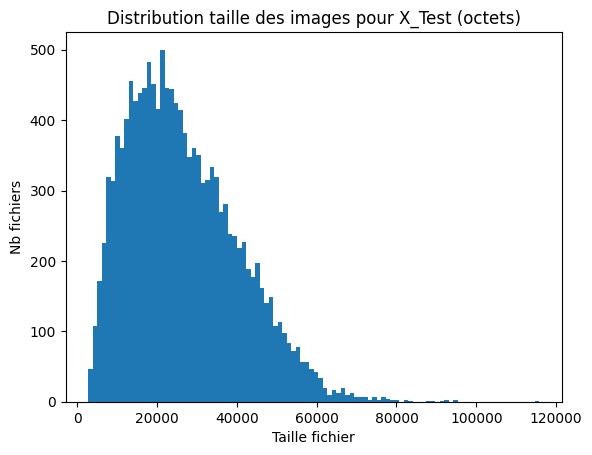

In [78]:
plt.hist(tmp_test['img_size'], bins=100)
plt.xlabel('Taille fichier')
plt.ylabel('Nb fichiers')
plt.title("Distribution taille des images pour X_Test (octets)")
plt.show()



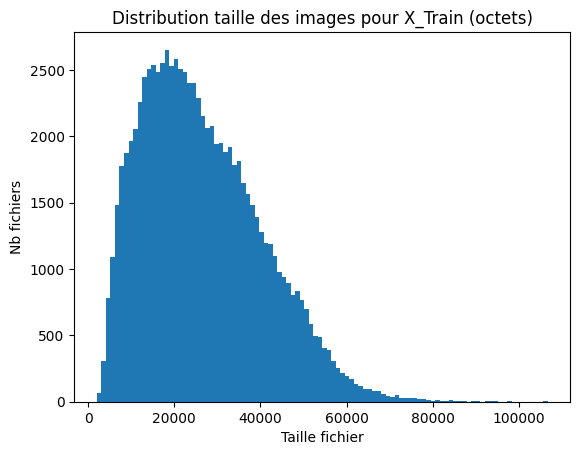

In [79]:
plt.hist(tmp_train['img_size'], bins=100)
plt.xlabel('Taille fichier')
plt.ylabel('Nb fichiers')
plt.title("Distribution taille des images pour X_Train (octets)")
plt.show()

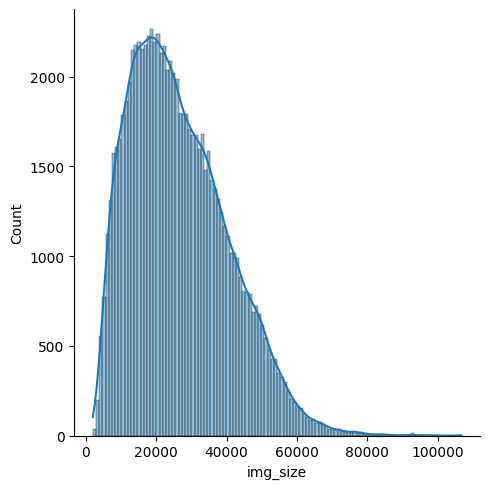

In [82]:
df_train = pd.concat([tmp_train, y_train], axis=1)
#df_train.head()

sns.displot(data=df_train, x='img_size', kde=True)
plt.show()


In [83]:
df_train.head()
#sns.displot(data=df_train, x='img_size', hue='', kde=True)
#plt.show()

,designation,description,productid,imageid,img_shape,img_size,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,"[500, 500]",14010,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,"[500, 500]",14854,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,"[500, 500]",6898,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,"[500, 500]",14404,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,"[500, 500]",20435,2705


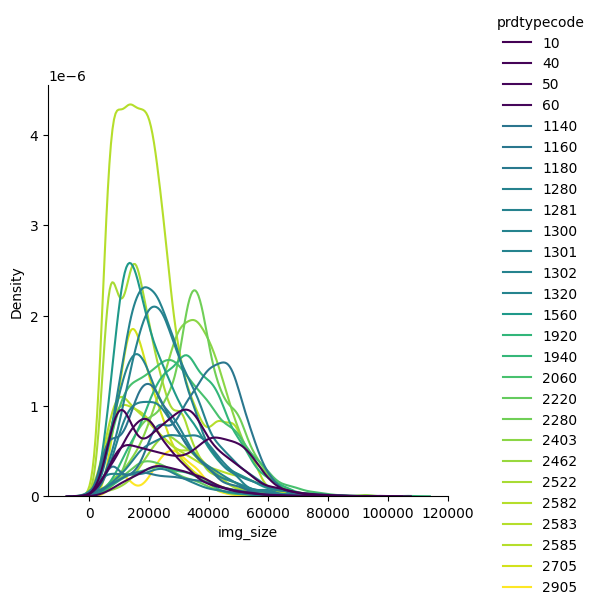

In [86]:
sns.displot(data=df_train, x='img_size', hue='prdtypecode', kind='kde', palette='viridis')
plt.show()